In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os


def symbol_to_path(symbol, base_dir='data'):
    """Return csv file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    
        
    for symbol in symbols:
        df_temp = pd.read_csv(
            symbol_to_path(symbol),
            index_col='Date',
            parse_dates=True,
            usecols=['Date', 'Adj Close'],
            na_values=['nan'])
    
        # rename to prevent crashing
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        # Join
        df = df.join(df_temp)

    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)
    return df


def plot_data(df, title="Stock prices", xlabel='Date', ylabel='Prices'):
    """Plot stock prices with a custom title and meaningful axis labels"""
    ax = df.plot(title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

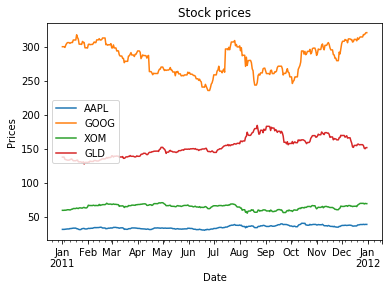

In [3]:
# Read data
dates = pd.date_range('2011-01-01', '2011-12-31')
symbols = ['AAPL', 'GOOG', 'XOM', 'GLD']

df = get_data(symbols, dates)
plot_data(df)

### Normalize data

In [4]:
def normalize_data(df):
    return df / df.iloc[0, :]

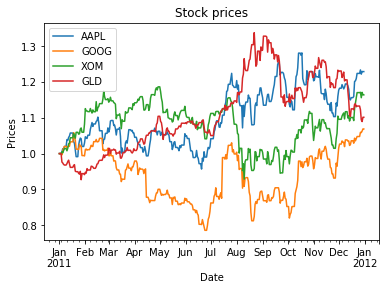

In [5]:
df_norm = normalize_data(df)
plot_data(df_norm)

### PreProcess

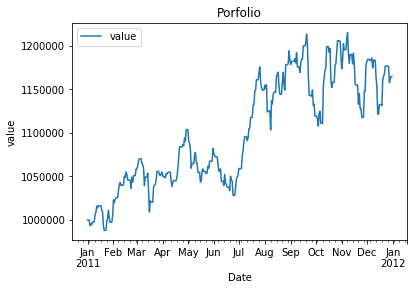

In [6]:
allocs = [0.4, 0.0, 0.2, 0.4]
start_value = 1000000

# Alloc
df_alloced = df_norm * allocs

# pos vals
pos_vals = df_alloced * start_value

# Porfolio values
port_vals = pos_vals.sum(axis=1)
port_vals = pd.DataFrame(port_vals, columns=['value'])
plot_data(port_vals, title="Porfolio", xlabel='Date', ylabel='value' )

In [7]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = (df / df.shift(1)) - 1
    
    # Set daily returns for row 0 to 0
    daily_returns.iloc[0, :] = 0
    return daily_returns


def cummulative_returns(df):
    return df[-1]/df[0] - 1


def shapre_ratio(daily_rets):
    import math
    k = math.sqrt(252)
    return k * daily_rets.mean() / daily_rets.std()

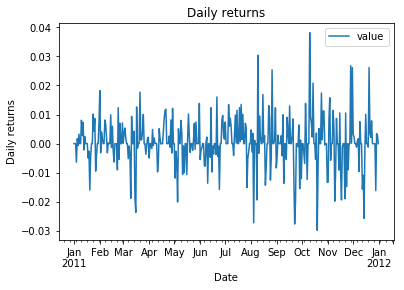

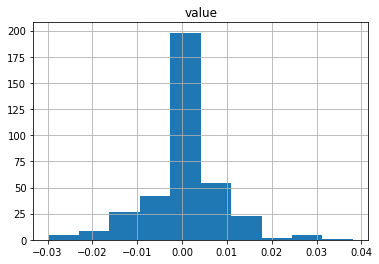

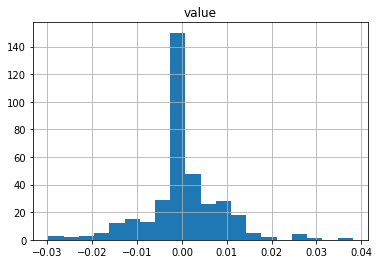

In [8]:
# Daily returns
daily_rets = compute_daily_returns(port_vals)
plot_data(daily_rets, title='Daily returns', ylabel='Daily returns')

# Plot daily returns histogram
daily_rets.hist()
daily_rets.hist(bins=20)
plt.show()

In [9]:
# Cummulative returns
cum_rets = cummulative_returns(port_vals['value'])
cum_rets

0.16488305997062302

In [10]:
# Shapre ratio
S_annual = shapre_ratio(daily_rets)
S_annual

value    0.852716
dtype: float64